<h1 align="center" style="color:brown;font-size:300%">Lab 3c : POS Tagging and NER</h1>


<div class="alert alert-block alert-info" >
<b style="font-size:200%">Question 1: Estimating N-gram probability</b><br>
 a) Generating a lookup table for all the words in a  given text for unigram probability 
</div>

### Reading the file

In [171]:
def load_words():
    with open('lab 3c.txt', 'r') as file:
        sentence=file.read()
#         words = file.read().split()
        
    return sentence

In [172]:
words=[]
sentence=load_words()
words=sentence.split()

In [173]:
words

['Bill',
 'will',
 'back',
 'the',
 'bill.',
 'Will',
 'does',
 'not',
 'like',
 'Bill.',
 'Sam',
 'is',
 'going',
 'to',
 'meet',
 'Will.']

In [174]:
sentence

'Bill will back the bill. Will does not like Bill. Sam is going to meet Will.  '

In [113]:
from collections import Counter
import string

### Preprocessing adding < s > (start and end of sentence)

In [114]:
def preprocess(d):
    d=d.lower()
    d="eos "+ d
    d=d.replace("."," eos")
    d=d.replace("?"," eos")
    
    return d
d=preprocess(sentence)
print("Preprocessed Data corpus = \n",d)

Preprocessed Data corpus = 
 eos bill will back the bill eos will does not like bill eos sam is going to meet will eos  


### Getting the tokens

In [116]:
from nltk import word_tokenize
def generate_tokens(d):
    tokens = word_tokenize(d)
    return tokens

### Distinct tokens

In [117]:
tokens=generate_tokens(d)
distinct_tokens = list(set(sorted(tokens)))
print("Tokens in the corpus = \n",distinct_tokens)

Tokens in the corpus = 
 ['not', 'will', 'does', 'like', 'to', 'eos', 'is', 'going', 'sam', 'bill', 'the', 'meet', 'back']


### Calculating the frequency of each token

In [118]:
def generate_tokens_freq(tokens):
    dct={}
    for i in tokens:
        dct[i]=0
    for i in tokens:
        dct[i]+=1
    return dct
dct=generate_tokens_freq(tokens)
print("Frequency of each tokens = ")
for i in dct.items():
    print(i[0],"\t:" , i[1])

Frequency of each tokens = 
eos 	: 4
bill 	: 3
will 	: 3
back 	: 1
the 	: 1
does 	: 1
not 	: 1
like 	: 1
sam 	: 1
is 	: 1
going 	: 1
to 	: 1
meet 	: 1


### Total frequency

In [119]:
total=sum(list(dct.values()))

### Generating unigram probability

In [120]:
def generate_uni(dct):
    probs=[]
    dct2={}
    for i,j in dct.items():
        prob=j/total
        probs.append(prob)
        dct2[i]=prob
    return dct2


### Final output

In [121]:
unigram=generate_uni(dct)
print("lookup dictionry for the unigram probability is :\n\n", unigram)

lookup dictionry for the unigram probability is :

 {'eos': 0.2, 'bill': 0.15, 'will': 0.15, 'back': 0.05, 'the': 0.05, 'does': 0.05, 'not': 0.05, 'like': 0.05, 'sam': 0.05, 'is': 0.05, 'going': 0.05, 'to': 0.05, 'meet': 0.05}


<div class="alert alert-block alert-info" >
<b style="font-size:200%">Question 1: Estimating N-gram probability</b><br>
 b) Using a bigram language model, calculate the probability of<br>
i) P(Sam/am) <br>
ii) P(green/like)<br>

    
</div>

### First let us generate n grams as a general function

In [122]:
def generate_ngrams(tokens,k):
    l=[]
    i=0
    while(i<len(tokens)):
        l.append(tokens[i:i+k])
        i=i+1
    l=l[:-1]
    return l
bigram = generate_ngrams(tokens,2)
print("N-grams generated (Here n is 2) = ")
for i in bigram:
    print(i)

N-grams generated (Here n is 2) = 
['eos', 'bill']
['bill', 'will']
['will', 'back']
['back', 'the']
['the', 'bill']
['bill', 'eos']
['eos', 'will']
['will', 'does']
['does', 'not']
['not', 'like']
['like', 'bill']
['bill', 'eos']
['eos', 'sam']
['sam', 'is']
['is', 'going']
['going', 'to']
['to', 'meet']
['meet', 'will']
['will', 'eos']


### Bigram frequency

In [123]:
def generate_ngram_freq(bigram):
    dct1={}
    for i in bigram:
        st=" ".join(i)
        dct1[st]=0
    for i in bigram:
        st=" ".join(i)
        dct1[st]+=1
    return dct1
dct1=generate_ngram_freq(bigram)
print("Frequency of n-grams = ")
for i in dct1.items():
    print(i[0], ":", i[1])

Frequency of n-grams = 
eos bill : 1
bill will : 1
will back : 1
back the : 1
the bill : 1
bill eos : 2
eos will : 1
will does : 1
does not : 1
not like : 1
like bill : 1
eos sam : 1
sam is : 1
is going : 1
going to : 1
to meet : 1
meet will : 1
will eos : 1


### Generating the bigram probability estimation lookup table

In [124]:
def find1(s,dct1):
    try:
        return dct1[s]
    except:
        return 0
def print_probability_table(distinct_tokens,dct,dct1):
    n=len(distinct_tokens)
    l=[[]*n for i in range(n)]
    for i in range(n):
        denominator = dct[distinct_tokens[i]]
        for j in range(n):
            numerator = find1(distinct_tokens[i]+" "+distinct_tokens[j],dct1)
            l[i].append(float("{:.3f}".format(numerator/denominator)))
    return l

### Dispaly the final table

In [125]:
print("Probability table = \n")
probability_table=print_probability_table(distinct_tokens,dct,dct1)
n=len(distinct_tokens)
print("\t", end="")
for i in range(n):
    print(distinct_tokens[i],end="\t")
print("\n")
for i in range(n):
    print(distinct_tokens[i],end="\t")
    for j in range(n):
        print(probability_table[i][j],end="\t")
    print("\n")

Probability table = 

	not	will	does	like	to	eos	is	going	sam	bill	the	meet	back	

not	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

will	0.0	0.0	0.333	0.0	0.0	0.333	0.0	0.0	0.0	0.0	0.0	0.0	0.333	

does	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

like	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	

to	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	

eos	0.0	0.25	0.0	0.0	0.0	0.0	0.0	0.0	0.25	0.25	0.0	0.0	0.0	

is	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	

going	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

sam	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	

bill	0.0	0.333	0.0	0.0	0.0	0.667	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

the	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	

meet	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

back	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	



In [133]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [177]:
from nltk.corpus import abc
print(abc.fileids())


['rural.txt', 'science.txt']


In [178]:
science= abc.words('science.txt')
print(science[:100])

['Cystic', 'fibrosis', 'affects', '30', ',', '000', 'children', 'and', 'young', 'adults', 'in', 'the', 'US', 'alone', 'Inhaling', 'the', 'mists', 'of', 'salt', 'water', 'can', 'reduce', 'the', 'pus', 'and', 'infection', 'that', 'fills', 'the', 'airways', 'of', 'cystic', 'fibrosis', 'sufferers', ',', 'although', 'side', 'effects', 'include', 'a', 'nasty', 'coughing', 'fit', 'and', 'a', 'harsh', 'taste', '.', 'That', "'", 's', 'the', 'conclusion', 'of', 'two', 'studies', 'published', 'in', 'this', 'week', "'", 's', 'issue', 'of', 'The', 'New', 'England', 'Journal', 'of', 'Medicine', '.', 'They', 'found', 'that', 'inhaling', 'a', 'mist', 'with', 'a', 'salt', 'content', 'of', '7', 'or', '9', '%', 'improved', 'lung', 'function', 'and', ',', 'in', 'some', 'cases', ',', 'produced', 'less', 'absenteeism', 'from', 'school']


<div class="alert alert-block alert-info" >
<b style="font-size:200%">Question 1: Estimating N-gram probability</b><br>
 b) Train an n-gram language model on a corpus. Compute the perplexity of a test set given by the user.

    
</div>

In [179]:
import nltk
from nltk.util import ngrams
from collections import defaultdict, Counter
import math

def train_ngram_model(word_list, n):
    ngram_model = defaultdict(Counter)
    
    # Adding start and end tokens
    word_list = ['<s>'] * (n-1) + word_list + ['</s>']
    
    for i in range(len(word_list) - n + 1):
        ngram = tuple(word_list[i:i+n-1])
        next_word = word_list[i+n-1]
        ngram_model[ngram][next_word] += 1
    
    # Normalizing counts to probabilities
    for ngram in ngram_model:
        total_count = float(sum(ngram_model[ngram].values()))
        for word in ngram_model[ngram]:
            ngram_model[ngram][word] /= total_count
    
    return ngram_model

def calculate_perplexity(word_list, ngram_model, n):
    N = 0
    log_probability_sum = 0.0
    
    word_list = ['<s>'] * (n-1) + word_list + ['</s>']
    N += len(word_list) - (n-1)
    
    for i in range(len(word_list) - n + 1):
        ngram = tuple(word_list[i:i+n-1])
        next_word = word_list[i+n-1]
        probability = ngram_model[ngram].get(next_word, 1e-7)  # Here we are Smoothing to avoid zero probabilities
        log_probability_sum += math.log(probability)
    
    perplexity = math.exp(-log_probability_sum / N)
    return perplexity

# In this case corpus: list of words in the science.txt in the abc corpus
corpus = list(science)
# corpus=science
n = 2

### Training process

In [181]:
ngram_model = train_ngram_model(corpus, n)

### Testing

<div class="alert alert-block alert-success">
<b>But first:</b> Let us understand what perplexity is.
</div>

Perplexity is an evaluation metric that measures the quality of language models.

<b>Intuitively, perplexity means to be surprised. We measure how much the model is surprised by seeing new data. The lower the perplexity, the better the training is.</b>

The formula for perplexity is the exponent of mean of log likelihood of all the words in an input sequence.

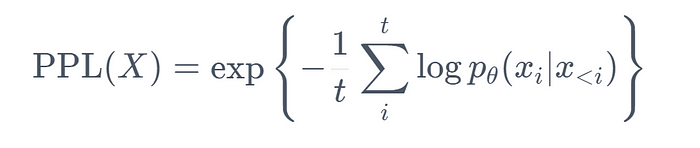



In [182]:
# Example test set: list of words
test_set = ["Cystic", "fibrosis"]
perplexity = calculate_perplexity(test_set, ngram_model, n)
print(f'Perplexity: {perplexity}')

Perplexity: 215.44346900318848


<div class="alert alert-block alert-danger">
<b>!! The perplexity of the given test corpus with respect to the bigram model trained on the training corpus is approximately 215.44. This means, on average, the model is as confused as if it had to choose uniformly and independently among 215 words each time it makes a prediction. Lower perplexity indicates a better predictive model.</b>
</div>

<div class="alert alert-block alert-info" >
<b style="font-size:200%">Question 2: POS Tagging</b><br>
 a) Use the Penn Treebank tagset to tag each word in the following sentences
from Damon Runyon’s short stories. You may ignore punctuation. Some of
these are quite difficult; do your best.<br>
1. It is a nice night.<br>
2. This crap game is over a garage in Fifty-second Street. . .<br>
3. . . . Nobody ever takes the newspapers she sells . . .<br>
4. He is a tall, skinny guy with a long, sad, mean-looking kisser, and a
mournful voice.<br>
</div>

In [166]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# List of sentences
sentences = [
    "It is a nice night.",
    "This crap game is over a garage in Fifty-second Street.",
    ". . . Nobody ever takes the newspapers she sells . . .",
    "He is a tall, skinny guy with a long, sad, mean-looking kisser, and a mournful voice."
]

# Tokenizing and POS tag each sentence
for sentence in sentences:
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)
    print(tagged)


[nltk_data] Downloading package punkt to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SOHAM CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('nice', 'JJ'), ('night', 'NN'), ('.', '.')]
[('This', 'DT'), ('crap', 'NN'), ('game', 'NN'), ('is', 'VBZ'), ('over', 'RP'), ('a', 'DT'), ('garage', 'NN'), ('in', 'IN'), ('Fifty-second', 'NNP'), ('Street', 'NNP'), ('.', '.')]
[('.', '.'), ('.', '.'), ('.', '.'), ('Nobody', 'NN'), ('ever', 'RB'), ('takes', 'VBZ'), ('the', 'DT'), ('newspapers', 'NNS'), ('she', 'PRP'), ('sells', 'VBZ'), ('.', '.'), ('.', '.'), ('.', '.')]
[('He', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('tall', 'JJ'), (',', ','), ('skinny', 'JJ'), ('guy', 'NN'), ('with', 'IN'), ('a', 'DT'), ('long', 'JJ'), (',', ','), ('sad', 'JJ'), (',', ','), ('mean-looking', 'JJ'), ('kisser', 'NN'), (',', ','), ('and', 'CC'), ('a', 'DT'), ('mournful', 'JJ'), ('voice', 'NN'), ('.', '.')]


<div class="alert alert-block alert-info" >

 b) Generate HMM tagger using transition and observational probabilities.

</div>

In [169]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [185]:
import nltk
from nltk.corpus import treebank

# Train data - pretagged
train_data = treebank.tagged_sents()[:3000]

print (train_data[0])

# Import HMM module
from nltk.tag import hmm

# Setup a trainer with default(None) values
# And then we train with the data
trainer = hmm.HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_data)

print (tagger)
# Prints the basic data about the tagger
print("\nHere are the generated HMM tags")
print (tagger.tag("Today is a good day .".split()))

print (tagger.tag("Joe met Joanne in Delhi .".split()))

print (tagger.tag("Chicago is the birthplace of Ginny".split()))


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
<HiddenMarkovModelTagger 46 states and 10779 output symbols>

Here are the generated HMM tags
[('Today', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('good', 'JJ'), ('day', 'NN'), ('.', '.')]
[('Joe', 'NNP'), ('met', 'VBD'), ('Joanne', 'NNP'), ('in', 'IN'), ('Delhi', 'NNP'), ('.', 'NNP')]
[('Chicago', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('birthplace', 'NNP'), ('of', 'NNP'), ('Ginny', 'NNP')]


### Generating transition and emission probabilities

In [186]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time
 
#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\SOHAM
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [187]:
#print each word with its respective tag for first two sentences
for sent in nltk_data[:2]:
  for tuple in sent:
    print(tuple)

('Pierre', 'NOUN')
('Vinken', 'NOUN')
(',', '.')
('61', 'NUM')
('years', 'NOUN')
('old', 'ADJ')
(',', '.')
('will', 'VERB')
('join', 'VERB')
('the', 'DET')
('board', 'NOUN')
('as', 'ADP')
('a', 'DET')
('nonexecutive', 'ADJ')
('director', 'NOUN')
('Nov.', 'NOUN')
('29', 'NUM')
('.', '.')
('Mr.', 'NOUN')
('Vinken', 'NOUN')
('is', 'VERB')
('chairman', 'NOUN')
('of', 'ADP')
('Elsevier', 'NOUN')
('N.V.', 'NOUN')
(',', '.')
('the', 'DET')
('Dutch', 'NOUN')
('publishing', 'VERB')
('group', 'NOUN')
('.', '.')


In [189]:

# split data into training and validation set in the ratio 80:20
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)


In [190]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [192]:
# check some of the tagged words.
train_tagged_words[:5]

[('Drink', 'NOUN'),
 ('Carrier', 'NOUN'),
 ('Competes', 'VERB'),
 ('With', 'ADP'),
 ('Cartons', 'NOUN')]

In [193]:
#use set datatype to check how many unique tags are present in training data
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}

12
{'ADJ', 'DET', 'ADP', 'PRT', 'NUM', 'CONJ', 'PRON', 'ADV', 'VERB', 'NOUN', '.', 'X'}


In [194]:
# compute Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
     
    return (count_w_given_tag, count_tag)

In [195]:
# compute  Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [196]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[6.33009672e-02 5.24271838e-03 8.05825219e-02 1.14563107e-02
  2.17475723e-02 1.68932043e-02 1.94174761e-04 5.24271838e-03
  1.14563107e-02 6.96893215e-01 6.60194159e-02 2.09708735e-02]
 [2.06410810e-01 6.03708485e-03 9.91806854e-03 2.87480245e-04
  2.28546783e-02 4.31220367e-04 3.30602261e-03 1.20741697e-02
  4.02472317e-02 6.35906279e-01 1.73925534e-02 4.51343954e-02]
 [1.07061505e-01 3.20931405e-01 1.69577319e-02 1.26550242e-03
  6.32751212e-02 1.01240189e-03 6.96026310e-02 1.45532778e-02
  8.47886596e-03 3.23588967e-01 3.87243740e-02 3.45482156e-02]
 [8.29745606e-02 1.01369865e-01 1.95694715e-02 1.17416831e-03
  5.67514673e-02 2.34833662e-03 1.76125243e-02 9.39334650e-03
  4.01174158e-01 2.50489235e-01 4.50097844e-02 1.21330721e-02]
 [3.53445187e-02 3.57015361e-03 3.74866128e-02 2.60621198e-02
  1.84219927e-01 1.42806144e-02 1.42806140e-03 3.57015361e-03
  2.07068902e-02 3.51660132e-01 1.19243130e-01 2.02427700e-01]
 [1.13611415e-01 1.23490669e-01 5.59824370e-02 4.39077942e-03
  4

In [197]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,ADJ,DET,ADP,PRT,NUM,CONJ,PRON,ADV,VERB,NOUN,.,X
ADJ,0.063301,0.005243,0.080583,0.011456,0.021748,0.016893,0.000194,0.005243,0.011456,0.696893,0.066019,0.020971
DET,0.206411,0.006037,0.009918,0.000287,0.022855,0.000431,0.003306,0.012074,0.040247,0.635906,0.017393,0.045134
ADP,0.107062,0.320931,0.016958,0.001266,0.063275,0.001012,0.069603,0.014553,0.008479,0.323589,0.038724,0.034548
PRT,0.082975,0.101370,0.019569,0.001174,0.056751,0.002348,0.017613,0.009393,0.401174,0.250489,0.045010,0.012133
NUM,0.035345,0.003570,0.037487,0.026062,0.184220,0.014281,0.001428,0.003570,0.020707,0.351660,0.119243,0.202428
CONJ,0.113611,0.123491,0.055982,0.004391,0.040615,0.000549,0.060373,0.057080,0.150384,0.349067,0.035126,0.009330
PRON,0.070615,0.009567,0.022323,0.014123,0.006834,0.005011,0.006834,0.036902,0.484738,0.212756,0.041913,0.088383
ADV,0.130721,0.071373,0.119472,0.014740,0.029868,0.006982,0.012025,0.081458,0.339022,0.032196,0.139255,0.022886
VERB,0.066390,0.133610,0.092357,0.030663,0.022836,0.005433,0.035543,0.083886,0.167956,0.110589,0.034807,0.215930
NOUN,0.012584,0.013106,0.176827,0.043935,0.009144,0.042454,0.004659,0.016895,0.149134,0.262344,0.240094,0.028825


<div class="alert alert-block alert-info" >
<b style="font-size:200%">Question 3: Named Entity Recognition</b><br>
 a) Implement NER with NLTK/spaCY/Stanford NER Tagger<br>
Input: John   lives in New   York<br>
Output: B-PER  O     O  B-LOC I-LOC<br>

</div>

In [199]:
import spacy
from spacy import displacy
from IPython.display import Image
from IPython.core.display import display, HTML

C:\Users\SOHAM CHATTERJEE\AppData\Local\Temp\ipykernel_8408\1247186552.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## NER with spaCy's pretrained models

In [201]:
# Load a pretrained spaCy model
nlp = spacy.load('en_core_web_sm')

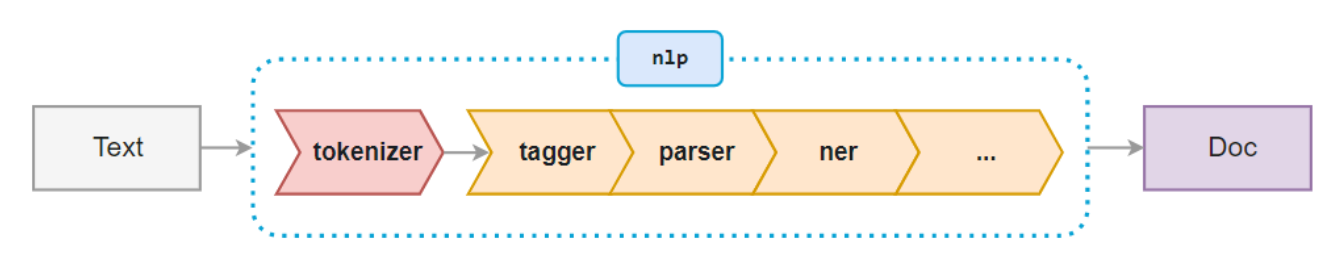

The pretrained model comes with a default processing pipeline that includes part-of-speech tagging, syntactic parsing, and NER.  The pretrained models are statistical and every “decision” they make is a prediction based on the examples the model has seen during training.  

spaCy makes it very easy to create your own pipelines consisting of reusable components – this includes spaCy’s default tagger, parser and entity recognizer, but also your own custom processing functions. 

In [203]:
# View pipeline components
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [205]:
text = """Last Monday, Sarah Johnson flew from New York City to San Francisco to attend a technology conference hosted by Apple Inc. at the Moscone Center. During her trip, she met with Dr. Alan Wright, a renowned AI researcher from Stanford University. They discussed the latest advancements in machine learning and the upcoming project funded by the National Science Foundation. Sarah also planned to visit the Golden Gate Bridge and Alcatraz Island before returning to her office at Microsoft in Redmond, Washington. She was particularly excited about the new partnership between Google and Tesla, which was announced earlier that week in a press release from Mountain View, California.
"""

In [207]:
# Run the text through the pretrained model
doc = nlp(text)

In [208]:
# The NER pipeline component tags entities in the doc with various attributes
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Last Monday 0 11 DATE
Sarah Johnson 13 26 PERSON
New York City 37 50 GPE
San Francisco 54 67 GPE
Apple Inc. 112 122 ORG
the Moscone Center 126 144 FAC
Alan Wright 180 191 PERSON
AI 204 206 ORG
Stanford University 223 242 ORG
the National Science Foundation 338 369 ORG
Sarah 371 376 PERSON
the Golden Gate Bridge 399 421 FAC
Alcatraz Island 426 441 LOC
Microsoft 476 485 ORG
Redmond 489 496 GPE
Washington 498 508 GPE
Google 573 579 ORG
Tesla 584 589 ORG
earlier that week 611 628 DATE
Mountain View 653 666 GPE
California 668 678 GPE


In [209]:
# Use displacy to visualize entities
displacy.render(doc, style='ent', jupyter=True)

### ----------------------------------------------------------------------------------x------------------------------------------------------------